### Reference
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_artist.html
- https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html#sphx-glr-gallery-text-labels-and-annotations-annotation-demo-py

In [1]:
import matplotlib.lines as lines
import matplotlib.text as text

from basic_units import cm, inch # this example requires basic_units.py
import numpy as np
import matplotlib.pyplot as plt

#### Line2D

Text(0.5, 1.0, 'Artists with units')

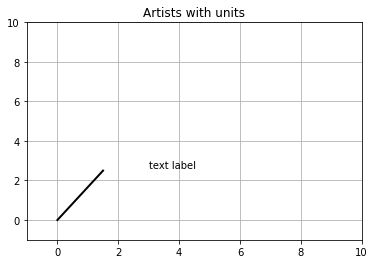

In [2]:
fig, ax = plt.subplots()
ax.xaxis.set_units(cm)
ax.yaxis.set_units(cm)

# test a plain-ol-line
line = lines.Line2D([0*cm, 1.5*cm], [0*cm, 2.5*cm], lw=2, color='black', axes=ax)
ax.add_line(line)

t = text.Text(3*cm, 2.5*cm, 'text label', ha='left', va='bottom',  axes=ax)
ax.add_artist(t)

ax.set_xlim(-1*cm, 10*cm)
ax.set_ylim(-1*cm, 10*cm)
ax.grid(True)
ax.set_title('Artists with units')

#### LegendBox

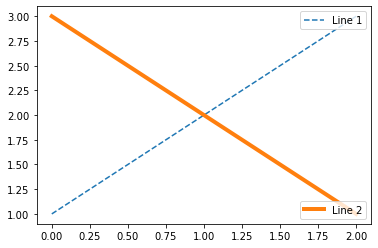

In [3]:
fix, ax = plt.subplots()

line1, = ax.plot([1,2,3], label='Line 1', linestyle='--')
line2, = ax.plot([3,2,1], label='Line 2', linewidth=4)

# Create a legend for the first line.
first_legend = ax.legend(handles = [line1], loc = 'upper right')

# Add the legend manually to the current Axes.
ax.add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=[line2], loc='lower right')

#### AnchoredBox

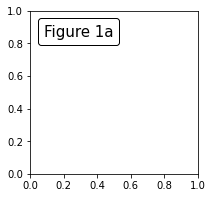

In [4]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(figsize=(3,3))

at = AnchoredText('Figure 1a', prop=dict(size=15), frameon=True, loc='upper left')
at.patch.set_boxstyle('round, pad=0.,rounding_size=0.2')
ax.add_artist(at)

#### AnchorBox 2

In [5]:
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredAuxTransformBox

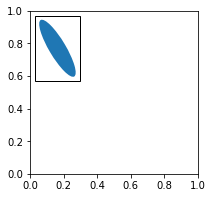

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))

box = AnchoredAuxTransformBox(ax.transData, loc='upper left')
el = Ellipse((0, 0), width=0.1, height=0.4, angle=30)  # in data coordinates!
box.drawing_area.add_artist(el)

ax.add_artist(box)

#### AnchorBox 3

In [8]:
from matplotlib.patches import Ellipse
from matplotlib.offsetbox import (AnchoredOffsetbox, DrawingArea, HPacker, TextArea)

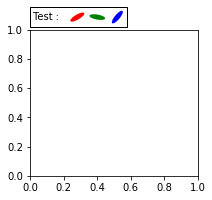

In [9]:
fig, ax = plt.subplots(figsize=(3, 3))

box1 = TextArea(" Test : ", textprops=dict(color="k"))
box2 = DrawingArea(60, 20, 0, 0)
el1 = Ellipse((10, 10), width=16, height=5, angle=30, fc="r")
el2 = Ellipse((30, 10), width=16, height=5, angle=170, fc="g")
el3 = Ellipse((50, 10), width=16, height=5, angle=230, fc="b")
box2.add_artist(el1)
box2.add_artist(el2)
box2.add_artist(el3)

box = HPacker(children=[box1, box2], align="center", pad=0, sep=5)

anchored_box = AnchoredOffsetbox(loc='lower left',
                                 child=box, pad=0.,
                                 frameon=True,
                                 bbox_to_anchor=(0., 1.02),
                                 bbox_transform=ax.transAxes,
                                 borderpad=0.,
                                 )

ax.add_artist(anchored_box)

fig.subplots_adjust(top=0.8)

#### Annotating Plots

[(-1.0, 5.0), (-3.0, 5.0)]

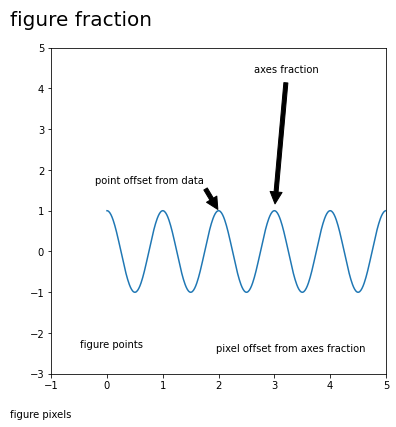

In [10]:
# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(6, 6))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')
ax.annotate('figure points',
            xy=(80, 80), xycoords='figure points')
ax.annotate('figure fraction',
            xy=(.025, .975), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

# The following examples show off how these arrows are drawn.

ax.annotate('point offset from data',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.annotate('axes fraction',
            xy=(3, 1), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# You may also use negative points or pixels to specify from (right, top).
# E.g., (-10, 10) is 10 points to the left of the right side of the axes and 10
# points above the bottom

ax.annotate('pixel offset from axes fraction',
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax.set(xlim=(-1, 5), ylim=(-3, 5))